In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from tqdm import tqdm_notebook

In [2]:
def plot(u):
    """ u(x, t) для fix t """
    global x
    plt.figure()#figsize=(10, 6)
    plt.xlabel('$x$')
    plt.ylabel('$u(x)$')
    plt.plot(x, u)

def plot_all(u):
    plt.matshow(u)
    plt.colorbar()

def animate(data):
    global x
    y = data
    line.set_data(x,y)
    return line,

Будем рассматривать задачу Коши для уравнения Хопфа

$\dfrac{\partial u}{\partial t} + u \dfrac{\partial u}{\partial x} = 0$

C начальными данными

$u(x, 0) = \phi(x) \ge \varepsilon > 0$

In [4]:
x0, x1 = -5, 5
Nx = 101
x = np.linspace(x0, x1, Nx, dtype=np.float64)

In [5]:
Nt = 101
t = np.zeros(Nt, dtype=np.float64)

In [25]:
eps = 1
def phi0(x):
    return np.where(np.abs(x + 2) > 2, 0, 2-np.abs(x + 2)) + eps

def phi1(x):
    return np.exp(-(x + 2)**2) + eps

def phi2(x):
    return 1 / np.cosh(x + 2) ** 2 + eps

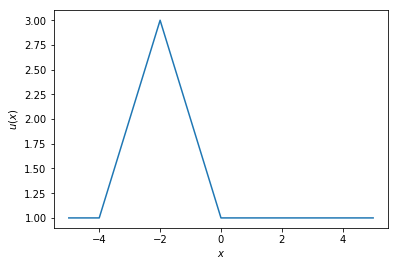

In [26]:
u = np.ones((Nt, Nx), dtype=np.float64) * eps
u[0] = phi0(x)
plot(u[0])

In [27]:
h = (x1 - x0) / (Nx - 1)
sigma = 0.9

### Референсное решение. Схема Куранта-Изаксона-Риса

$\dfrac{y_m^{n+1} - y_m^n}{\tau} + \dfrac{(y_m^n)^2 - (y_{m-1}^n)^2}{2h} = 0$

$y_m^{n+1} = y_m^n - \dfrac{\tau}{2h}((y_m^n)^2 - (y_{m-1}^n)^2)$

In [28]:
for n in tqdm_notebook(range(Nt - 1)):
    tau = sigma * h / np.max(u[n])
    u[n + 1, 1:] = u[n, 1:] - 0.5 * tau / h * (u[n, 1:] ** 2 - u[n, :-1] ** 2)
    
    # ГУ
    u[n + 1, [0, -1]] = u[n, [0, -1]]
    
    t[n + 1] = t[n] + tau

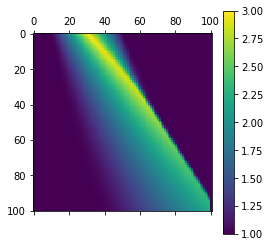

In [29]:
plot_all(u)

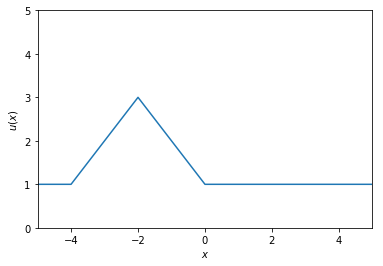

In [30]:
fig = plt.figure();#figsize=(10, 6)
ax = plt.axes(xlim=(-5,5),ylim=(0,5), xlabel=('$x$'),ylabel=('$u(x)$'));
line, = plt.plot([],[]); # ,color='#003366', lw=2

anim = animation.FuncAnimation(fig, animate, frames=u, interval=101);

In [31]:
HTML(anim.to_jshtml())

In [32]:
u_ref = u.copy()

### Сеточно-характеристические методы: аналог схемы Куранта-Изаксона-Риса

In [59]:
x0, x1 = -5, 5
Nx = 101
x = np.linspace(x0, x1, Nx, dtype=np.float64)

In [34]:
Nt = 101
t = np.zeros(Nt, dtype=np.float64)

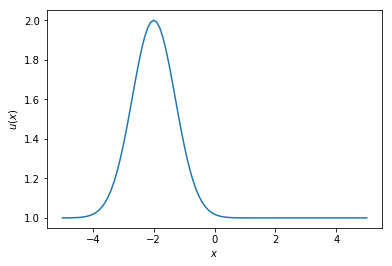

In [50]:
u = np.ones((Nt, Nx), dtype=np.float64) * eps
u[0] = phi1(x)
plot(u[0])

$v = u^2,~t=t_0$ 

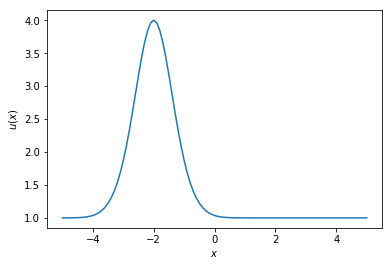

In [51]:
v = np.zeros((Nt, Nx), dtype=np.float64)
v[0] = u[0] ** 2
plot(v[0])

$R^{+} = \dfrac{1}{3}(u - \sqrt{u^2 + 3v})u - \dfrac{v}{2}$

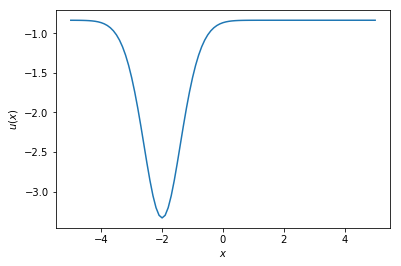

In [52]:
Rp = np.zeros((Nt, Nx), dtype=np.float64)
Rp[0] = 1/3 * (u[0] - np.sqrt(u[0] ** 2 + 3 * v[0])) * u[0] - 0.5 * v[0]
plot(Rp[0])

$R^- =  \dfrac{1}{3}(u + \sqrt{u^2 + 3v})u - \dfrac{v}{2}$

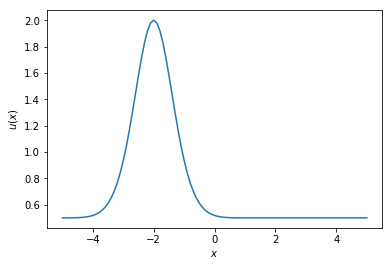

In [53]:
Rm = np.zeros((Nt, Nx), dtype=np.float64)
Rm[0] = 1/3 * (u[0] + np.sqrt(u[0] ** 2 + 3 * v[0])) * u[0] - 0.5 * v[0]
plot(Rm[0])

$\dfrac{R_m^{+n+1}-R_m^{+n}}{\tau} + \dfrac{1}{3}(u + \sqrt{u^2 + 3v})_m^n\dfrac{R_m^{+n}-R_{m-1}^{+n}}{h}=0$

$\dfrac{R_m^{-n+1}-R_m^{-n}}{\tau} + \dfrac{1}{3}(u - \sqrt{u^2 + 3v})_m^n\dfrac{R_{m+1}^{-n}-R_m^{-n}}{h}=0$

$R_m^{+n+1} = R_m^{+n} - \dfrac{\tau}{3h}(u + \sqrt{u^2 + 3v})_m^n(R_m^{+n}-R_{m-1}^{+n})$

$R_m^{-n+1} = R_m^{-n} - \dfrac{\tau}{3h}(u - \sqrt{u^2 + 3v})_m^n(R_{m+1}^{-n}-R_m^{-n})$

$u = -\dfrac{3}{2\sqrt{u^2 + 3v}}(R^{+} - R^{-})$

$v = -\dfrac{1}{\sqrt{u^2 + 3v}}((u + \sqrt{u^2 + 3v})R^{+} - (u - \sqrt{u^2 + 3v})R^{-})$


In [54]:
h = (x1 - x0) / (Nx - 1)
sigma = 0.9

In [55]:
for n in tqdm_notebook(range(Nt - 1)):
    tau = sigma * h / np.max(u[n])
    
    A = tau / (3 * h)
    B = np.sqrt(u[n] ** 2 + 3 * v[n])
    
    Rp[n + 1, 1:-1] = Rp[n, 1:-1] - A * (u[n, 1:-1] + B[1:-1]) * (Rp[n, 1:-1] - Rp[n, :-2])
    Rm[n + 1, 1:-1] = Rm[n, 1:-1] - A * (u[n, 1:-1] - B[1:-1]) * (Rm[n, 2:] - Rm[n, 1:-1])
    
    u[n + 1] = -1.5 * (Rp[n + 1] - Rm[n + 1]) / B
    v[n + 1] = - ((u[n] + B) * Rp[n + 1] - (u[n] - B) * Rm[n + 1]) / B
    
    # BC
    u[n + 1, [0, -1]] = u[n, [0, -1]]
    v[n + 1, [0, -1]] = v[n, [0, -1]]
    Rp[n + 1, [0, -1]] = Rp[n, [0, -1]]
    Rm[n + 1, [0, -1]] = Rm[n, [0, -1]]
    
    t[n + 1] = t[n] + tau

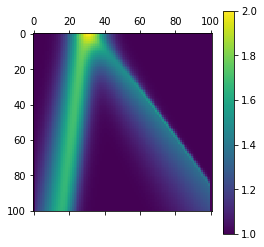

In [56]:
plot_all(u)

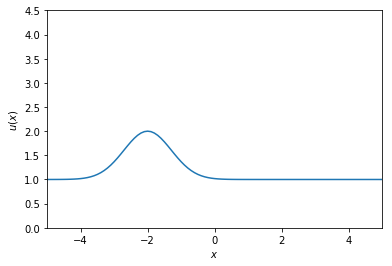

In [57]:
fig = plt.figure();#figsize=(10, 6)
ax = plt.axes(xlim=(-5,5),ylim=(0,4.5), xlabel=('$x$'),ylabel=('$u(x)$'));
line, = plt.plot([],[]); # ,color='#003366', lw=2

anim = animation.FuncAnimation(fig, animate, frames=u, interval=101);

In [58]:
HTML(anim.to_jshtml())

In [60]:
u_000 = u.copy()

### Сеточно-характеристические методы: аналог схемы Куранта-Изаксона-Риса
Попытка исправить ситуацию

In [61]:
x0, x1 = -5, 5
Nx = 101
x = np.linspace(x0, x1, Nx, dtype=np.float64)

In [62]:
Nt = 101
t = np.zeros(Nt, dtype=np.float64)

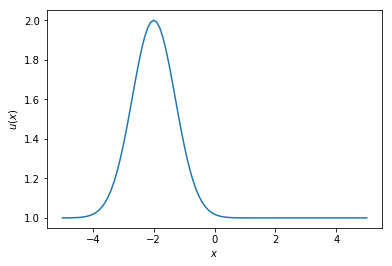

In [63]:
u = np.ones((Nt, Nx), dtype=np.float64) * eps
u[0] = phi1(x)
plot(u[0])

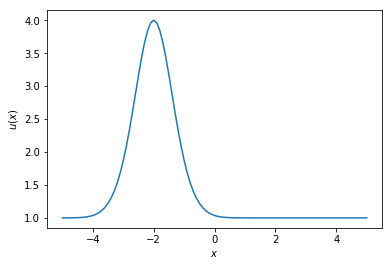

In [64]:
v = np.zeros((Nt, Nx), dtype=np.float64)
v[0] = u[0] ** 2
plot(v[0])

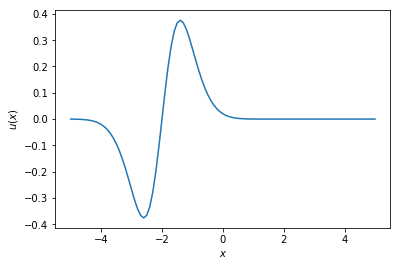

In [97]:
Rp = np.zeros((Nt, Nx), dtype=np.float64)
Rp[0, 1:-1] = 1/3 * (u[0, 1:-1] - np.sqrt(u[0, 1:-1] ** 2 + 3 * v[0, 1:-1])) * (u[0, 2:] - u[0, :-2]) - 0.5 * (v[0, 2:] - v[0, :-2])
plot(Rp[0])

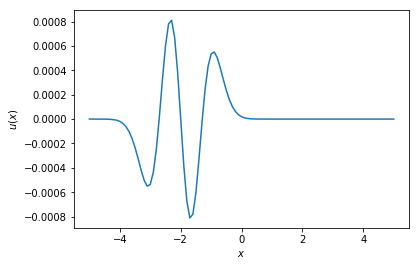

In [98]:
Rm = np.zeros((Nt, Nx), dtype=np.float64)
Rm[0, 1:-1] = 1/3 * (u[0, 1:-1] + np.sqrt(u[0, 1:-1] ** 2 + 3 * v[0, 1:-1])) * (u[0, 2:] - u[0, :-2]) - 0.5 * (v[0, 2:] - v[0, :-2])
plot(Rm[0])

In [99]:
h = (x1 - x0) / (Nx - 1)
sigma = 0.9

In [100]:
for n in tqdm_notebook(range(Nt - 1)):
    tau = sigma * h / np.max(u[n])
    
    A = tau / (3 * h)
    B = np.sqrt(u[n] ** 2 + 3 * v[n])
    
    Rp[n + 1, 1:-1] = Rp[n, 1:-1] - A * (u[n, 1:-1] + B[1:-1]) * (Rp[n, 1:-1] - Rp[n, :-2])
    Rm[n + 1, 1:-1] = Rm[n, 1:-1] - A * (u[n, 1:-1] - B[1:-1]) * (Rm[n, 2:] - Rm[n, 1:-1])
    
    u[n + 1] = u[n] - 1.5 * (Rp[n + 1] - Rp[n] - Rm[n + 1] + Rm[n]) / B
    v[n + 1] = v[n] - ((u[n] + B) * (Rp[n + 1] - Rp[n]) - (u[n] - B) * (Rm[n + 1] - Rm[n])) / B
    
    # BC
    u[n + 1, [0, -1]] = u[n, [0, -1]]
    v[n + 1, [0, -1]] = v[n, [0, -1]]
    Rp[n + 1, [0, -1]] = Rp[n, [0, -1]]
    Rm[n + 1, [0, -1]] = Rm[n, [0, -1]]
    
    t[n + 1] = t[n] + tau

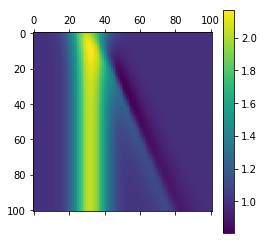

In [101]:
plot_all(u)

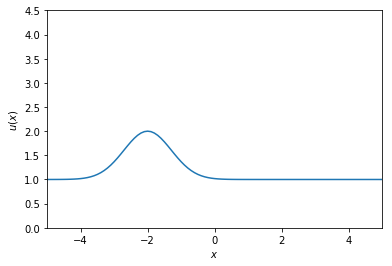

In [102]:
fig = plt.figure();#figsize=(10, 6)
ax = plt.axes(xlim=(-5,5),ylim=(0,4.5), xlabel=('$x$'),ylabel=('$u(x)$'));
line, = plt.plot([],[]); # ,color='#003366', lw=2

anim = animation.FuncAnimation(fig, animate, frames=u, interval=101);

In [103]:
HTML(anim.to_jshtml())

In [25]:
u = np.loadtxt('res.dat', dtype=np.object)

In [26]:
u[u == '-nan(ind)'] = 'nan'

In [27]:
u = np.array([list(map(float, u[i])) for i in range(u.shape[0])])

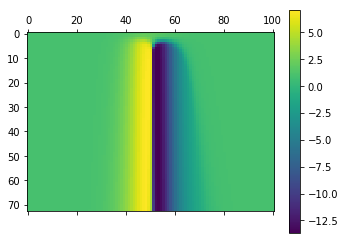

In [28]:
plot_all(u)

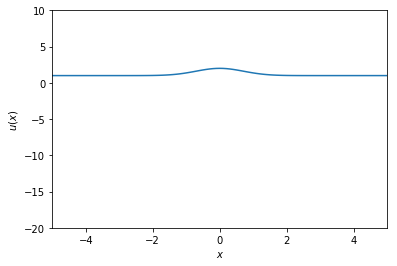

In [29]:
fig = plt.figure();#figsize=(10, 6)
ax = plt.axes(xlim=(-5,5),ylim=(-20,10), xlabel=('$x$'),ylabel=('$u(x)$'));
line, = plt.plot([],[]); # ,color='#003366', lw=2

anim = animation.FuncAnimation(fig, animate, frames=u, interval=101);

In [30]:
HTML(anim.to_jshtml())

In [31]:
u = np.exp(-(x)**2) + 0.1
v = u ** 2
Rp = 0.5 * u - (u + np.sqrt(u ** 2 + 3 * v)) * v / 3
Rm = 0.5 * u - (u - np.sqrt(u ** 2 + 3 * v)) * v / 3

In [69]:
u_new = u.copy()
v_new = v.copy()
Rp_new = Rp.copy()
Rm_new = Rm.copy()

In [70]:
# Courant, Isaacson, Rees
def CIR(u, v, Rp, Rm, dt, dx):
    return (
        Rp[1:-1] - 1/3 * dt/dx * (u[1:-1] + np.sqrt(u[1:-1]**2 + 3*v[1:-1])) * (Rp[1:-1] - Rp[:-2]),
        Rm[1:-1] - 1/3 * dt/dx * (u[1:-1] - np.sqrt(u[1:-1]**2 + 3*v[1:-1])) * (Rm[2:] - Rm[1:-1])
    )

# Lax, Wendroff
def LW(u, v, Rp, Rm, dt, dx):
    return (
        Rp[1:-1] + 1/6 * dt/dx * (u[1:-1] + np.sqrt(u[1:-1]**2 + 3*v[1:-1])) * (dt/dx * (u[1:-1] + np.sqrt(u[1:-1]**2 + 3*v[1:-1])) * (Rp[2:] - 2*Rp[1:-1] - Rp[:-2]) - Rp[1:-1] + Rp[:-2]),
        Rm[1:-1] + 1/6 * dt/dx * (u[1:-1] - np.sqrt(u[1:-1]**2 + 3*v[1:-1])) * (dt/dx * (u[1:-1] - np.sqrt(u[1:-1]**2 + 3*v[1:-1])) * (Rm[2:] - 2*Rm[1:-1] - Rm[:-2]) - Rm[2:] + Rm[1:-1])
    )

In [71]:
def update_uv(u, v, Rp, Rm):
    return (
        -1/np.sqrt(u**2 + 3*v)*((u - np.sqrt(u**2 + 3*v))*Rp - (u + np.sqrt(u**2 + 3*v))*Rm),
        -1.5*(Rp - Rm)/np.sqrt(u**2 + 3*v)
    )

0.10842435598596963


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


0.12012996529766917


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


nan


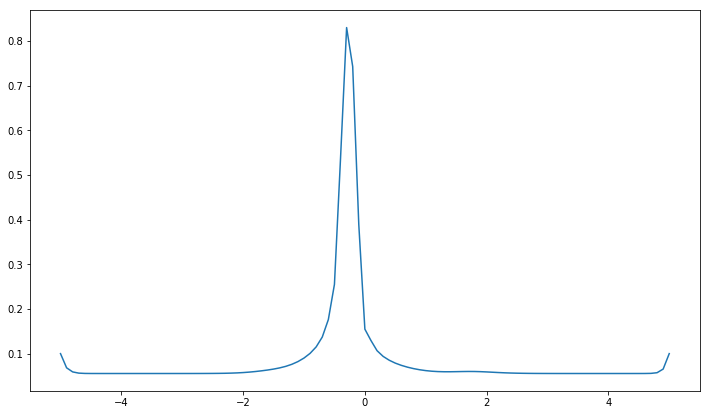

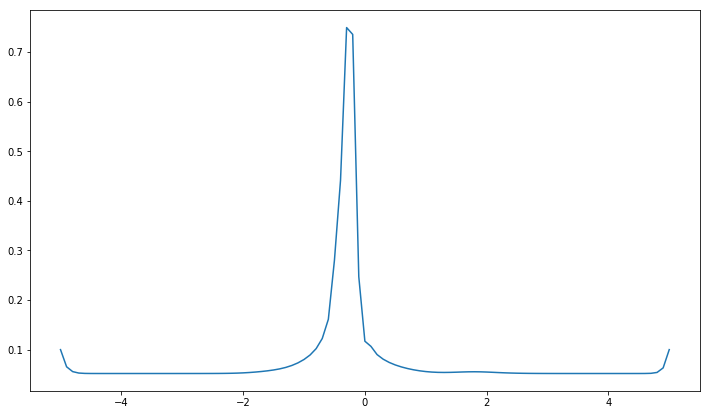

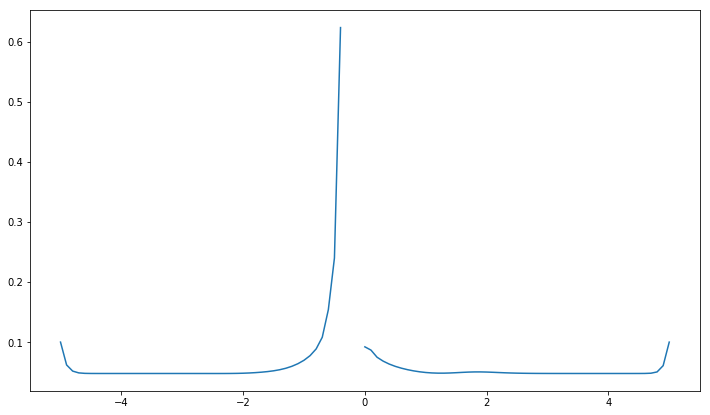

In [74]:
t = 0
while t < T:
    plt.figure(figsize=(12, 7));
    plt.plot(x, u);
    
    dt = dx * sigma / np.max(u)
    print(dt)
    Rp_new[1:-1], Rm_new[1:-1] = LW(u, v, Rp, Rm, dt, dx)
    u_new[1:-1], v_new[1:-1] = update_uv(u[1:-1], v[1:-1], 
                                         Rp_new[1:-1], 
                                         Rm_new[1:-1])

    u = u_new.copy()
    v = v_new.copy()

    Rp = 0.5 * u - (u + np.sqrt(u ** 2 + 3 * v)) * v / 3
    Rm = 0.5 * u - (u - np.sqrt(u ** 2 + 3 * v)) * v / 3
    
    t += dt
    
    
    

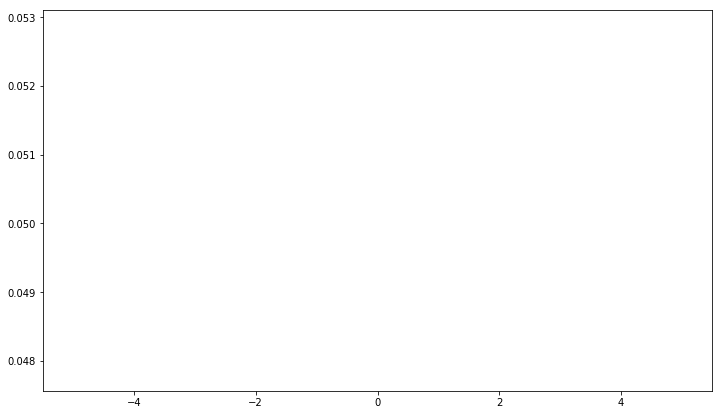

In [51]:
plt.figure(figsize=(12, 7))
plt.plot(x, Rm);